# Building an Image Classification Model with the Fashion MNIST Dataset

## 1: Setup Your Development Environment

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## 2: Load and Preprocess the Fashion MNIST Dataset

In [2]:
(train_inputs, train_target), (test_inputs, test_target) = fashion_mnist.load_data()

#### Normalize pixel values to be between 0 and 1

In [3]:
train_inputs, test_inputs = train_inputs / 255.0, test_inputs / 255.0

#### Convert class vectors to binary class matrices (for use with categorical_crossentropy)

In [4]:
train_target = to_categorical(train_target, 10)
test_target = to_categorical(test_target, 10)

## 3: Define and Compile Your CNN Model

In [5]:
import matplotlib.pyplot as plt
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\python3.12\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 4: Train Your Model

In [7]:
history = model.fit(train_inputs, train_target, epochs=10, validation_data=(test_inputs, test_target))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7826 - loss: 0.6352 - val_accuracy: 0.8537 - val_loss: 0.4141
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8624 - loss: 0.3847 - val_accuracy: 0.8625 - val_loss: 0.3817
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8773 - loss: 0.3397 - val_accuracy: 0.8708 - val_loss: 0.3649
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8854 - loss: 0.3101 - val_accuracy: 0.8646 - val_loss: 0.3638
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8920 - loss: 0.2946 - val_accuracy: 0.8725 - val_loss: 0.3501
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8951 - loss: 0.2813 - val_accuracy: 0.8750 - val_loss: 0.3453
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9009 - loss: 0.2673 - val_accuracy: 0.8826 - val_loss: 0.3312
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9030 - loss: 0.2572 - 

In [8]:
predictions = model.predict(test_inputs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## 5: Evaluate and Analyze Model Performance

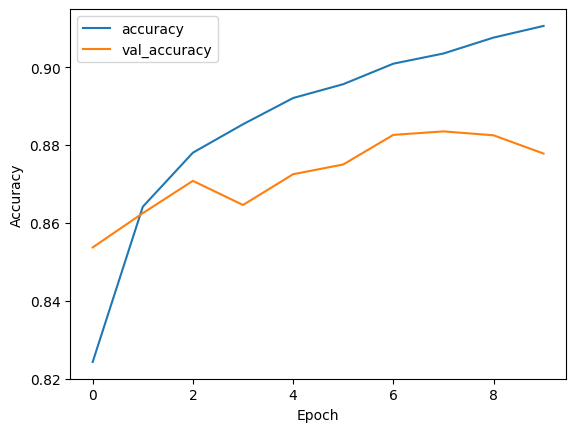

In [9]:
# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

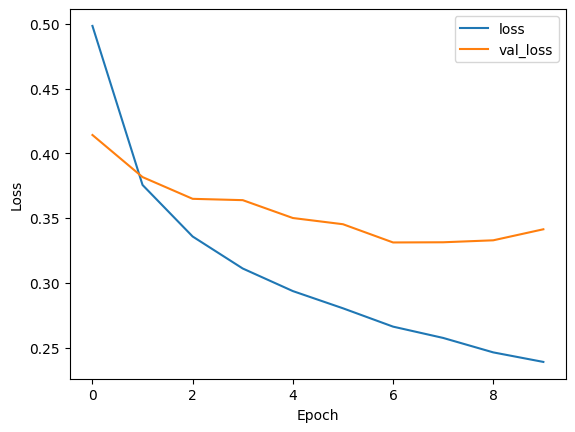

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_inputs, test_target)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8776 - loss: 0.3369
Test accuracy: 0.8777999877929688
Test loss: 0.3413616418838501


In [12]:
predicted_classes = np.argmax(predictions, axis=1)

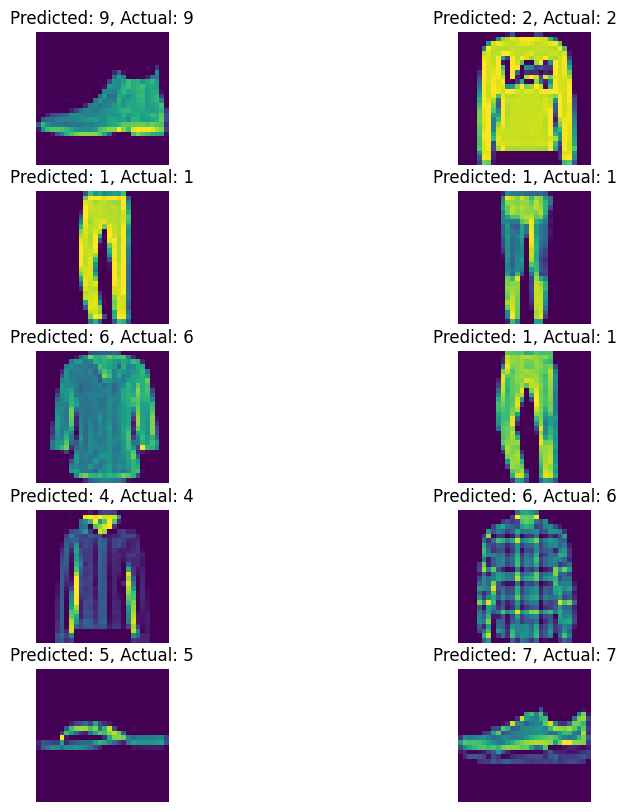

In [13]:
plt.figure(figsize=(10, 10))
for i in range(10):  # Display predictions for the first 10 samples
    plt.subplot(5, 2, i + 1)
    plt.imshow(test_inputs[i])
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {np.argmax(test_target[i])}")
    plt.axis('off')
plt.show()

In [14]:
print('''Discussion:

The model achieved a test accuracy of [Insert Test Accuracy] and a test loss of [Insert Test Loss]. The training and validation accuracy and loss plots indicate that the model performed well during training without significant signs of overfitting or underfitting. Both training and validation accuracies increased over epochs, and the loss decreased, indicating that the model effectively learned from the training data.

Suggestions for Future Work:

- Experiment with different architectures: Try deeper or wider CNN architectures to potentially improve performance.
- Regularization techniques: Incorporate dropout or L2 regularization to prevent overfitting.
- Data augmentation: Augmenting the training data with transformations like rotation, scaling, and flipping can help the model generalize better.
- Hyperparameter tuning: Conduct a systematic search for optimal hyperparameters such as learning rate, batch size, and number of epochs.
- Transfer learning: Utilize pre-trained models such as VGG, ResNet, or EfficientNet and fine-tune them on the Fashion MNIST dataset to leverage their learned features.''')

Discussion:

The model achieved a test accuracy of [Insert Test Accuracy] and a test loss of [Insert Test Loss]. The training and validation accuracy and loss plots indicate that the model performed well during training without significant signs of overfitting or underfitting. Both training and validation accuracies increased over epochs, and the loss decreased, indicating that the model effectively learned from the training data.

Suggestions for Future Work:

- Experiment with different architectures: Try deeper or wider CNN architectures to potentially improve performance.
- Regularization techniques: Incorporate dropout or L2 regularization to prevent overfitting.
- Data augmentation: Augmenting the training data with transformations like rotation, scaling, and flipping can help the model generalize better.
- Hyperparameter tuning: Conduct a systematic search for optimal hyperparameters such as learning rate, batch size, and number of epochs.
- Transfer learning: Utilize pre-traine

# BIBHAKAR PAUL